In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config IPCompleter.use_jedi=False

In [5]:
!pip install -q markovify

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.translate.ibm1 import IBMModel1
from nltk.translate import AlignedSent, Alignment
import markovify

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
corpus = []
with open('../data/raw/anki/fra-eng/fra.txt', 'r', encoding='utf8') as f:
    for line in f.readlines():
        corpus.append(line.lower()) #TODO: Try True-casing instead of lower-casing (frequency-based winner-takes-all)

In [8]:
len(corpus)

189114

In [9]:
%%time
en_fr = [entry.split('\t')[:2] for entry in corpus]
en, fr = zip(*en_fr)
en_tokenized = [word_tokenize(sentence, language='english') for sentence in en]
fr_tokenized = [word_tokenize(sentence, language='french') for sentence in fr]

CPU times: user 42.9 s, sys: 81.1 ms, total: 42.9 s
Wall time: 42.9 s


In [10]:
%%time
en_model = markovify.NewlineText('\n'.join(en), state_size=5)
fr_model = markovify.NewlineText('\n'.join(fr), state_size=5)

CPU times: user 10.2 s, sys: 191 ms, total: 10.4 s
Wall time: 10.4 s


In [13]:
for i in range(5):
    print(en_model.make_sentence(tries=1000))

i've already drunk half a bottle of wine while i was waiting for the streetcar, i witnessed a traffic accident.
i want you to know that i won't be able to help you on monday.
she was advised by him to go abroad while he was still young.
if he keeps threatening you, then you should go to the dentist and have that tooth pulled out.
i told you i don't know how to talk to kids.


In [12]:
for i in range(5):
    print(fr_model.make_sentence(tries=1000))

dis-moi juste que ça ne va pas être beau à voir.
je ne me sens pas bien aujourd'hui et je préfère rester à la maison plutôt que de sortir sous la pluie.
je peux assez bien lire le chinois mais je ne parviens pas à me rappeler l'endroit où j'ai caché mon argent.
je sais que vous êtes occupés, mais est-ce que je peux te parler en privé ?
dis à tom que je ne suis pas quelqu'un de patient.


In [110]:
#TODO: https://github.com/nltk/nltk/blob/develop/nltk/lm/__init__.py

In [58]:
%%time
bitext = []
for fr, en in zip(fr_tokenized, en_tokenized):
    bitext.append(AlignedSent(fr, en))

CPU times: user 1.37 s, sys: 52.2 ms, total: 1.42 s
Wall time: 1.42 s


In [59]:
%%time
ibm1 = IBMModel1(bitext, 10)

CPU times: user 3min 21s, sys: 103 ms, total: 3min 21s
Wall time: 3min 21s


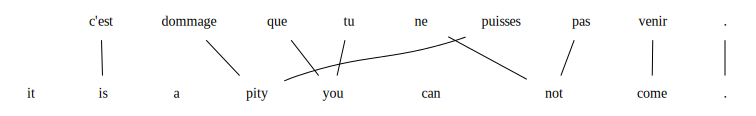

In [61]:
test = bitext[100000]
test

In [62]:
test.words

["c'est", 'dommage', 'que', 'tu', 'ne', 'puisses', 'pas', 'venir', '.']

In [63]:
test.mots

['it', 'is', 'a', 'pity', 'you', 'can', 'not', 'come', '.']

In [64]:
test.alignment

Alignment([(0, 1), (1, 3), (2, 4), (3, 4), (4, 6), (5, 3), (6, 6), (7, 7), (8, 8)])

In [33]:
ibm1.translation_table['bravo']

defaultdict(<function nltk.translate.ibm1.IBMModel1.set_uniform_probabilities.<locals>.<lambda>()>,
            {None: 1e-12,
             'good': 0.10694902844430497,
             'job': 0.030056176307917612,
             '!': 1e-12})

In [57]:
word_tokenize("j'ai froncé les sourcils.", language='french')

["j'ai", 'froncé', 'les', 'sourcils', '.']

In [68]:
ibm1.hillclimb?